# Linear Regression with one variable

In [62]:
# import dependencies
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

In [2]:
#Data
df = pd.read_csv("Data/Rounded_Student_Hours_Studied_vs_Marks_Dataset.csv")

In [3]:
df

,Hours_Studied,Marks
0,4.76,46.27
1,3.00,34.30
2,2.08,33.63
3,4.04,47.81
4,9.49,66.26
...,...,...
95,3.20,28.66
96,9.76,70.27
97,4.54,43.99
98,9.03,65.17


In [63]:
# Convert the data to numpy array
X_train = df["Hours_Studied"].to_numpy()
y_train = df["Marks"].to_numpy()

In [64]:
X_train[:5]  # look first five values

array([4.76, 3.  , 2.08, 4.04, 9.49])

In [65]:
y_train[:5]  # first five values

array([46.27, 34.3 , 33.63, 47.81, 66.26])

In [7]:
# size
m = X_train.shape[0]
m

100

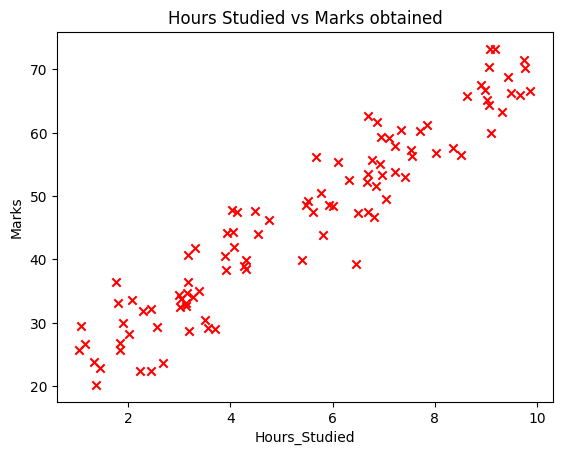

In [60]:
#visualise the data
plt.scatter(X_train , y_train , marker = 'x' , c = "red")
plt.title("Hours Studied vs Marks obtained")
plt.xlabel("Hours_Studied")
plt.ylabel("Marks");

In [66]:
#Simple function to calculate marks (output) based on hours studied(input)
def compute_output(x,w,b):
    fwb = np.zeros(x.shape[0])
    for i in range(m):
        fwb[i] = w*x[i]+b
    return fwb

In [68]:
tmp_fwb = compute_output(X_train , 10, 0)
tmp_fwb[:5]  # predicted values

array([47.6, 30. , 20.8, 40.4, 94.9])

In [67]:
y_train[:5]   # actual values

array([46.27, 34.3 , 33.63, 47.81, 66.26])

## Compute cost or error

In [ ]:
def compute_cost(x,y,w,b):
    total_cost = 0
    for i in range(m):
        fwb = w*x[i]+b
        cost = (fwb-y[i])**2
        total_cost = cost+total_cost

    return total_cost /(2*m)

In [57]:
compute_cost(X_train , y_train , 10 , 0)  # try with random valuse of parametes ( w= 10 & b=0)

113.24096099999997

In [58]:
compute_cost(X_train, y_train , 10 , 0)

113.24096099999997

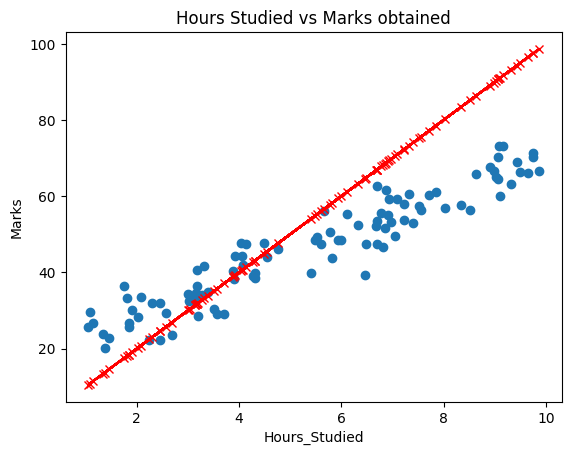

In [59]:
plt.scatter(X_train , y_train , marker = "o")
plt.plot(X_train , tmp_fwb , marker = "x" , color = "red")
plt.title("Hours Studied vs Marks obtained")
plt.xlabel("Hours_Studied")
plt.ylabel("Marks");

### So we've to find the values of parameters (w and b) for which the cost is minimum.

To automate the process of finding w and b for which the cost is minimum , we will use Gradient Descent

In [26]:
def compute_gradients(x , y , w , b):
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        fwb = w*x[i]+b
        dj_dw_i = (fwb-y[i])*x[i]
        dj_db_i = (fwb - y[i])
        dj_dw = dj_dw + dj_dw_i
        dj_db = dj_db + dj_db_i

    return dj_dw/m , dj_db/m

In [69]:
# intialise parameters
w_in = 0
b_in = 0

In [31]:
def gradient_descent(x , y , w_in , b_in , alpha , num_iters , cost , gradients):
    J_history = []
    p_history = []
    w = w_in
    b = b_in

    for i in range(num_iters):
        dj_dw , dj_db = gradients(x , y , w , b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i<100000:
            J_history.append(cost(x,y,w,b))
            p_history.append([w,b])

        if i%math.ceil(num_iters/10)==0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
    

In [61]:
gradient_descent(X_train,
                y_train ,
                w_in,
                b_in,
                0.0001, # learning rate
                100000, # number of iterations
                compute_cost,
                compute_gradients)

Iteration    0: Cost 1.17e+03  dj_dw: -2.840e+02, dj_db: -4.636e+01   w:  2.840e-02, b: 4.63602e-03
Iteration 10000: Cost 2.89e+01  dj_dw:  3.952e-01, dj_db: -2.600e+00   w:  7.388e+00, b: 4.04240e+00
Iteration 20000: Cost 2.32e+01  dj_dw:  3.291e-01, dj_db: -2.166e+00   w:  7.026e+00, b: 6.41876e+00
Iteration 30000: Cost 1.91e+01  dj_dw:  2.741e-01, dj_db: -1.803e+00   w:  6.726e+00, b: 8.39776e+00
Iteration 40000: Cost 1.64e+01  dj_dw:  2.282e-01, dj_db: -1.502e+00   w:  6.475e+00, b: 1.00458e+01
Iteration 50000: Cost 1.44e+01  dj_dw:  1.901e-01, dj_db: -1.251e+00   w:  6.267e+00, b: 1.14183e+01
Iteration 60000: Cost 1.31e+01  dj_dw:  1.583e-01, dj_db: -1.042e+00   w:  6.093e+00, b: 1.25613e+01
Iteration 70000: Cost 1.21e+01  dj_dw:  1.318e-01, dj_db: -8.674e-01   w:  5.948e+00, b: 1.35132e+01
Iteration 80000: Cost 1.15e+01  dj_dw:  1.098e-01, dj_db: -7.224e-01   w:  5.828e+00, b: 1.43059e+01
Iteration 90000: Cost 1.11e+01  dj_dw:  9.142e-02, dj_db: -6.016e-01   w:  5.727e+00, b: 1.4

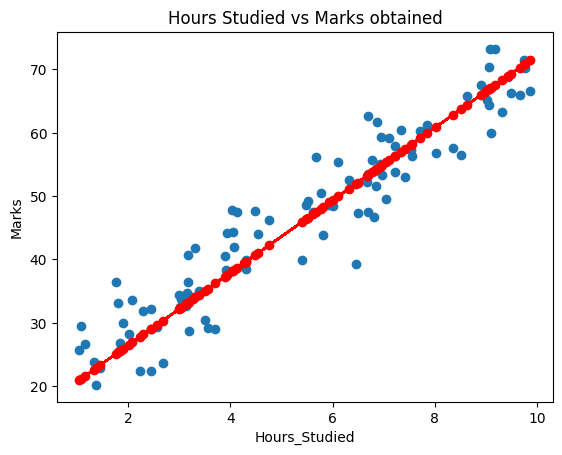

In [56]:
# let's visualise
plt.scatter(X_train , y_train , marker = "o")
plt.plot(X_train , compute_output(X_train ,  5.727, 14.9660) , marker = "o" , color = "red")
plt.title("Hours Studied vs Marks obtained")
plt.xlabel("Hours_Studied")
plt.ylabel("Marks");

Let's verify the parameters using `scikit-learn`.

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [43]:
X_tr , X_t , y_tr , y_t = train_test_split(X_train.reshape(100,1), y_train.reshape(100,1) , test_size = 0.2)

In [44]:
reg = LinearRegression()

In [45]:
reg.fit(X_tr , y_tr)

LinearRegression()

In [46]:
X_train.ndim

1

In [52]:
reg.coef_ # weight

array([[5.3129906]])

In [53]:
reg.intercept_  # bias

array([17.8707577])